In [23]:
import pandas as pd 

### Preprocessing

In [24]:
df = pd.read_csv('dataset/synthetic_logs.csv')
print(df.shape)
df.head() 

(2410, 4)


,timestamp,source,log_message,target_label
0,27/06/2025 07:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert
3,12/07/2025 00:24,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status
4,02/06/2025 18:25,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status


In [25]:
df.source.unique() 

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

In [26]:
df.target_label.unique() 

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

#### Generate embeddings to perform DBScan clustering

In [27]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
import numpy as np 

# load the pretrained sentence transformer model 
model = SentenceTransformer('all-MiniLM-L6-v2')

# generate embeddings from log messages
embeddings = model.encode(df.log_message.to_list())
embeddings[:2] 

array([[-1.02939636e-01,  3.35459523e-02, -2.20260546e-02,
         1.55100389e-03, -9.86921228e-03, -1.78956240e-01,
        -6.34410754e-02, -6.01762086e-02,  2.81108841e-02,
         5.99619858e-02, -1.72618460e-02,  1.43366517e-03,
        -1.49560049e-01,  3.15286848e-03, -5.66030517e-02,
         2.71685906e-02, -1.49889914e-02, -3.54037695e-02,
        -3.62935811e-02, -1.45410020e-02, -5.61488094e-03,
         8.75538737e-02,  4.55121286e-02,  2.50962824e-02,
         1.00187296e-02,  1.24266446e-02, -1.39923573e-01,
         7.68696517e-02,  3.14094983e-02, -4.15249960e-03,
         4.36903723e-02,  1.71250124e-02, -8.00951347e-02,
         5.74005879e-02,  1.89092755e-02,  8.55261460e-02,
         3.96399647e-02, -1.34371817e-01, -1.44359958e-03,
         3.06711020e-03,  1.76854119e-01,  4.44889208e-03,
        -1.69274341e-02,  2.24267263e-02, -4.35049385e-02,
         6.09024614e-03, -9.98167042e-03, -6.23972081e-02,
         1.07372217e-02, -6.04892010e-03, -7.14660808e-0

#### DBScan Clustering

In [28]:
# perform DBScan clustering
optics = DBSCAN(min_samples=1, eps=0.2, metric='cosine')
clusters = optics.fit_predict(embeddings) 

# add cluster labels to df
df['cluster'] = clusters 
df.head() 

,timestamp,source,log_message,target_label,cluster
0,27/06/2025 07:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2
3,12/07/2025 00:24,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0
4,02/06/2025 18:25,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0


In [29]:
df[df.cluster == 20]

,timestamp,source,log_message,target_label,cluster
46,1/14/2025 4:46,ModernHR,User 7662 tried to bypass API security measures,Security Alert,20
159,9/28/2025 3:18,BillingSystem,User 2367 failed to provide valid API access c...,Security Alert,20
229,11/17/2025 16:13,ModernHR,User 3569 made an unauthorized API request,Security Alert,20
279,8/27/2025 16:33,ModernCRM,Unauthorized user 2968 tried to access restric...,Security Alert,20
368,04/05/2025 11:26,ThirdPartyAPI,User 2186 attempted to access API without prop...,Security Alert,20
384,10/14/2025 11:29,AnalyticsEngine,Unapproved API login attempt from user 1618 re...,Security Alert,20
435,08/03/2025 08:12,AnalyticsEngine,Security alert: unauthorized API access attemp...,Security Alert,20
480,1/22/2025 1:56,ModernHR,Unapproved API login attempt from user 5771 re...,Security Alert,20
517,3/21/2025 15:20,BillingSystem,Unauthenticated API access attempt from user 7...,Security Alert,20
533,4/19/2025 16:16,AnalyticsEngine,API access denied due to unauthorized credenti...,Security Alert,20


In [30]:
cluster_counts = df.cluster.value_counts()
large_clusters = cluster_counts[cluster_counts > 10].index

for cluster in large_clusters: 
    print(f'Cluster {cluster}')
    print(df[df.cluster == cluster]['log_message'].head().to_string(index=False))

print(f'Count: {len(large_clusters)}') 

Cluster 0
nova.osapi_compute.wsgi.server [req-b9718cd8-f6...
nova.osapi_compute.wsgi.server [req-4895c258-b2...
nova.osapi_compute.wsgi.server [req-ee8bc8ba-92...
nova.osapi_compute.wsgi.server [req-f0bffbc3-5a...
nova.osapi_compute.wsgi.server [req-2bf7cfee-a2...
Cluster 5
nova.compute.claims [req-a07ac654-8e81-416d-bfb...
nova.compute.claims [req-d6986b54-3735-4a42-907...
nova.compute.claims [req-72b4858f-049e-49e1-b31...
nova.compute.claims [req-5c8f52bd-8e3c-41f0-95a...
nova.compute.claims [req-d38f479d-9bb9-4276-968...
Cluster 11
User User685 logged out.
 User User395 logged in.
 User User225 logged in.
User User494 logged out.
 User User900 logged in.
Cluster 13
Backup started at 2025-05-14 07:06:55.
Backup started at 2025-02-15 20:00:19.
  Backup ended at 2025-08-08 13:06:23.
Backup started at 2025-11-14 08:27:43.
Backup started at 2025-12-09 10:19:11.
Cluster 7
Multiple bad login attempts detected on user 85...
Multiple login failures occurred on user 9052 a...
  User 7153 made

### Regex Classification Logic

In [31]:
import re 
def classify_with_regex(log_message): 
    patterns = {
        r'(\sUser|User) User\d+ logged (out|in).': 'User Action',
        r'(\s*Backup|Backup) (started|ended) at \d{4}-\d{2}-\d{2} \d+:\d+:\d+.': 'System Notification',
        r'Backup completed successfully.': 'System Notification',
        r'System updated to version \d+.\d+.\d+.': 'System Notification',
        r'Disk cleanup completed successfully.': 'System Notification',
        r'System reboot initiated by user User\d+.': 'System Notification',
        r'Account with ID \d+ created by User\d+.': 'User Action', 
        r'(\s*User|User) \d+ (has escalated|escalated) (privileges to|to) admin level': 'Security Alert',
        r'(\s*Admin|Admin) privilege escalation alert for user \d+': 'Security Alert',
        r'Elevation of admin privileges detected for user \d+': 'Security Alert'
    }
    
    for pattern, label in patterns.items(): 
        if re.search(pattern, log_message, re.IGNORECASE):
            return label
    return 'Unclassified'

In [32]:
classify_with_regex('User 8483 escalated privileges to admin level')

'Security Alert'

In [33]:
df['regex_label'] = df.log_message.apply(classify_with_regex)
df.head() 

,timestamp,source,log_message,target_label,cluster,regex_label
0,27/06/2025 07:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0,Unclassified
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,Unclassified
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2,Unclassified
3,12/07/2025 00:24,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0,Unclassified
4,02/06/2025 18:25,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0,Unclassified


In [34]:
df[df.regex_label != 'Unclassified'].shape 

(459, 6)

In [35]:
df[df.regex_label == 'Unclassified'].shape 

(1951, 6)

In [36]:
df.regex_label.value_counts()

regex_label
Unclassified           1951
System Notification     303
User Action             144
Security Alert           12
Name: count, dtype: int64

In [37]:
# create a dataframe that only contains the unclassified labels after the regex classification
df_non_regex = df[df.regex_label == 'Unclassified']
print(df_non_regex.shape)
df_non_regex.head()

(1951, 6)


,timestamp,source,log_message,target_label,cluster,regex_label
0,27/06/2025 07:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0,Unclassified
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,Unclassified
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2,Unclassified
3,12/07/2025 00:24,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0,Unclassified
4,02/06/2025 18:25,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0,Unclassified


In [38]:
[k for k, v in df_non_regex.target_label.value_counts().to_dict().items() if v < 5]

['Workflow Error', 'Deprecation Warning']

In [39]:
# Exclude LegacyCRM logs to focus on relevant, up to date data sources
df_non_legacy = df_non_regex[df_non_regex.source != 'LegacyCRM']
df_non_legacy.source.unique() 

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI'], dtype=object)

### Generate Embeddings for Log Messages

In [40]:
# generate embeddings for log messages 
filtered_embeddings = model.encode(df_non_legacy['log_message'].to_list())
filtered_embeddings[:2]

array([[-1.02939636e-01,  3.35459523e-02, -2.20260546e-02,
         1.55100389e-03, -9.86921228e-03, -1.78956240e-01,
        -6.34410754e-02, -6.01762086e-02,  2.81108841e-02,
         5.99619858e-02, -1.72618460e-02,  1.43366517e-03,
        -1.49560049e-01,  3.15286848e-03, -5.66030517e-02,
         2.71685906e-02, -1.49889914e-02, -3.54037695e-02,
        -3.62935811e-02, -1.45410020e-02, -5.61488094e-03,
         8.75538737e-02,  4.55121286e-02,  2.50962824e-02,
         1.00187296e-02,  1.24266446e-02, -1.39923573e-01,
         7.68696517e-02,  3.14094983e-02, -4.15249960e-03,
         4.36903723e-02,  1.71250124e-02, -8.00951347e-02,
         5.74005879e-02,  1.89092755e-02,  8.55261460e-02,
         3.96399647e-02, -1.34371817e-01, -1.44359958e-03,
         3.06711020e-03,  1.76854119e-01,  4.44889208e-03,
        -1.69274341e-02,  2.24267263e-02, -4.35049385e-02,
         6.09024614e-03, -9.98167042e-03, -6.23972081e-02,
         1.07372217e-02, -6.04892010e-03, -7.14660808e-0

In [41]:
df_non_legacy.target_label.unique() 

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage'], dtype=object)

In [42]:
df_non_legacy.head()

,timestamp,source,log_message,target_label,cluster,regex_label
0,27/06/2025 07:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0,Unclassified
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,Unclassified
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2,Unclassified
3,12/07/2025 00:24,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0,Unclassified
4,02/06/2025 18:25,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0,Unclassified


### Model Building

#### Attempt 1 - Multinomial Naive Bayes 


In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 

In [45]:
# label encode the target labels
le = LabelEncoder() 
y = le.fit_transform(df_non_legacy.target_label) 
y

array([2, 0, 4, ..., 2, 0, 4])

In [46]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(filtered_embeddings, y, test_size=0.2, random_state=42, stratify=df_non_legacy.target_label)

X_train.shape, X_test.shape 

((1555, 384), (389, 384))

In [54]:
# train the MultinomialNB model 
pipe_MNB = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('classifier', MultinomialNB())
])

pipe_MNB.fit(X_train, y_train) 

Pipeline(steps=[('scaler', MinMaxScaler()), ('classifier', MultinomialNB())])

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

In [55]:
y_pred = pipe_MNB.predict(X_test) 
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.97      0.97      0.97        35
           2       1.00      1.00      1.00       204
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        72
           5       1.00      1.00      1.00        11

    accuracy                           0.99       389
   macro avg       0.99      0.99      0.99       389
weighted avg       0.99      0.99      0.99       389



#### Attempt 2 - Descision Tree classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier 

In [56]:
pipe_DT = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('classifier', DecisionTreeClassifier(criterion='entropy', splitter='random'))
])

pipe_DT.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy',
                                        splitter='random'))])

In [57]:
y_pred = pipe_DT.predict(X_test) 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.82      0.80      0.81        35
           2       1.00      1.00      1.00       204
           3       1.00      1.00      1.00        35
           4       0.89      0.93      0.91        72
           5       1.00      1.00      1.00        11

    accuracy                           0.96       389
   macro avg       0.94      0.93      0.94       389
weighted avg       0.96      0.96      0.96       389



#### Attempt 3 - Random Forest Classifier


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
pipe_RF = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('classifier', RandomForestClassifier(criterion='entropy', n_estimators=10))
])

pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=10))])

In [63]:
y_pred = pipe_DT.predict(X_test) 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.82      0.80      0.81        35
           2       1.00      1.00      1.00       204
           3       1.00      1.00      1.00        35
           4       0.89      0.93      0.91        72
           5       1.00      1.00      1.00        11

    accuracy                           0.96       389
   macro avg       0.94      0.93      0.94       389
weighted avg       0.96      0.96      0.96       389



#### Attempt 4 - Logistic Regression 

In [64]:
from sklearn.linear_model import LogisticRegression

In [76]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(filtered_embeddings, df_non_legacy.target_label, test_size=0.2, random_state=42, stratify=df_non_legacy.target_label)

X_train.shape, X_test.shape 

((1555, 384), (389, 384))

In [77]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_pred = lr.predict(X_test) 
print(classification_report(y_test, y_pred)) 

                     precision    recall  f1-score   support

     Critical Error       1.00      1.00      1.00        32
              Error       1.00      1.00      1.00        35
        HTTP Status       1.00      1.00      1.00       204
     Resource Usage       1.00      1.00      1.00        35
     Security Alert       1.00      1.00      1.00        72
System Notification       1.00      1.00      1.00        11

           accuracy                           1.00       389
          macro avg       1.00      1.00      1.00       389
       weighted avg       1.00      1.00      1.00       389



#### from the 4 Models, Logistic Regression performs well, so I select the Logistic Regerssion model

Text(0.5, 1.0, 'Confusion Matrix')

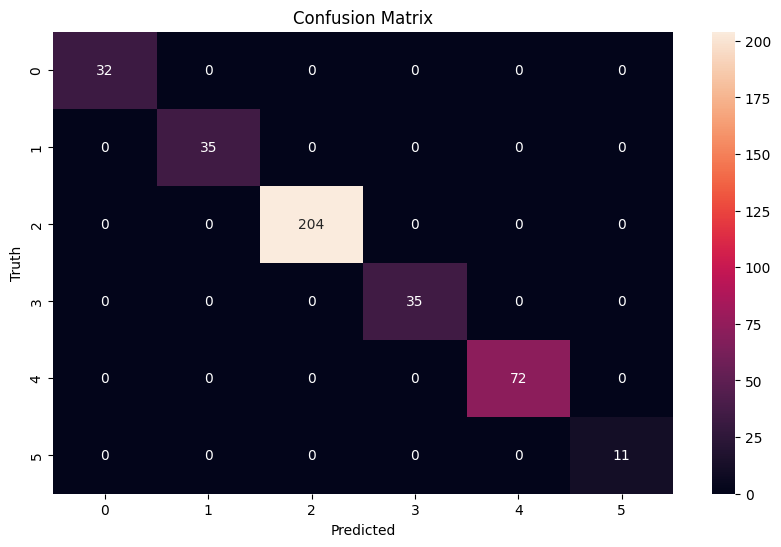

In [79]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

### Export the model

In [81]:
import joblib
joblib.dump(lr, '/home/madhuka/ML/NLP/Repos/Hybrid-Log-Classification-/models/log_classifier.joblib') 

['/home/madhuka/ML/NLP/Repos/Hybrid-Log-Classification-/models/log_classifier.joblib']

In [ ]:
df_non_regex[df_non_regex.source == 'LegacyCRM']

,timestamp,source,log_message,target_label,cluster,regex_label
60,06/10/2025 16:55,LegacyCRM,Lead conversion failed for prospect ID 7842 du...,Workflow Error,24,Unclassified
255,03/05/2025 16:55,LegacyCRM,API endpoint 'getCustomerDetails' is deprecate...,Deprecation Warning,48,Unclassified
377,24/06/2025 12:16,LegacyCRM,Customer follow-up process for lead ID 5621 fa...,Workflow Error,62,Unclassified
1325,17/04/2025 07:33,LegacyCRM,Escalation rule execution failed for ticket ID...,Workflow Error,105,Unclassified
1734,30/04/2025 07:47,LegacyCRM,The 'ExportToCSV' feature is outdated. Please ...,Deprecation Warning,118,Unclassified
1826,23/01/2025 10:33,LegacyCRM,Support for legacy authentication methods will...,Deprecation Warning,122,Unclassified
2217,12/05/2025 09:46,LegacyCRM,Task assignment for TeamID 3425 could not comp...,Workflow Error,133,Unclassified
